#### Forecasting rainfall for each day of the year based on meterological features (binary classification problem)

## EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv") 

from IPython.display import display
display(df.head(20))

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
9,9,10,1025.4,16.5,14.4,12.0,8.6,77.0,84.0,1.0,50.0,38.3,0


In [2]:
df.info()
df.describe()
df['rainfall'].value_counts(normalize=True)  # class balance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


1    0.753425
0    0.246575
Name: rainfall, dtype: float64

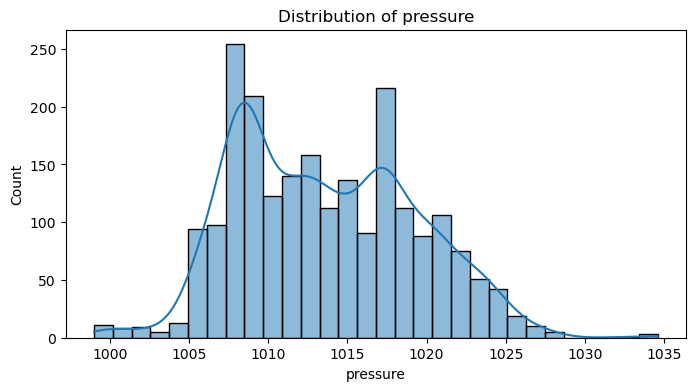

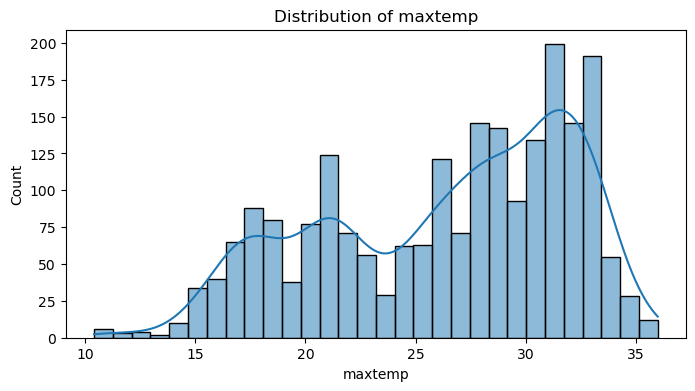

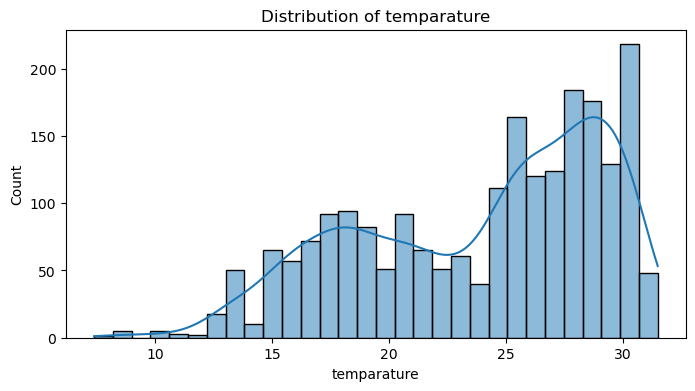

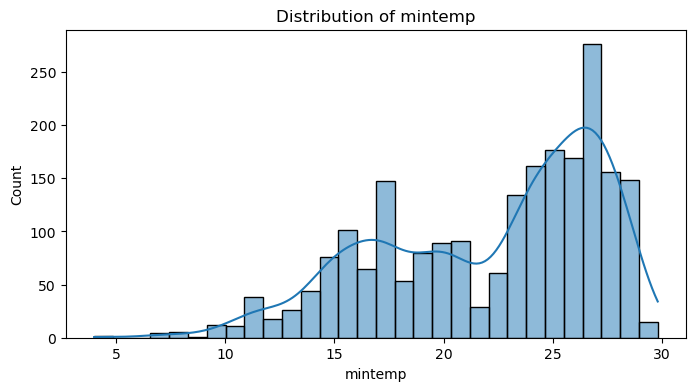

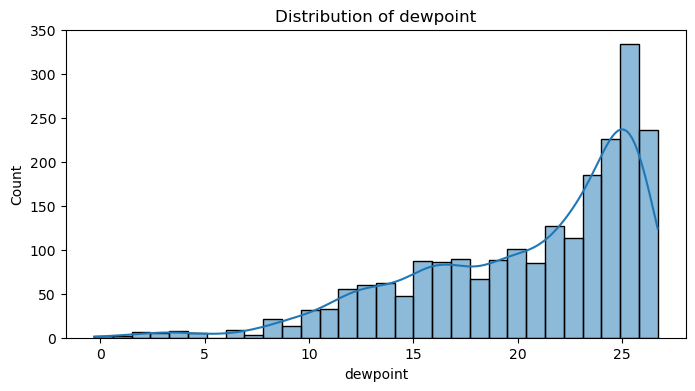

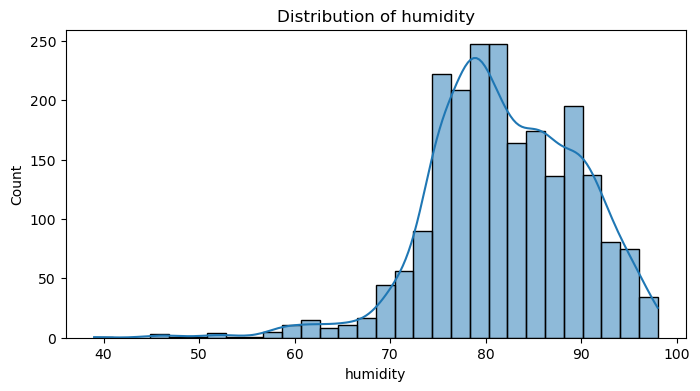

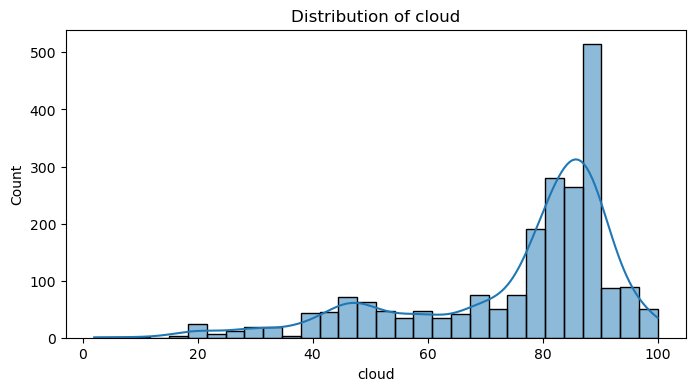

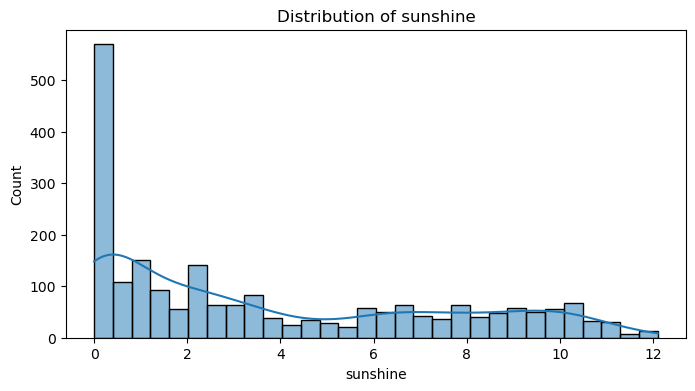

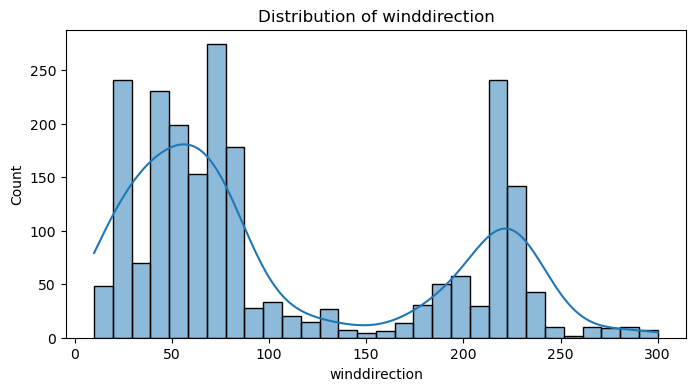

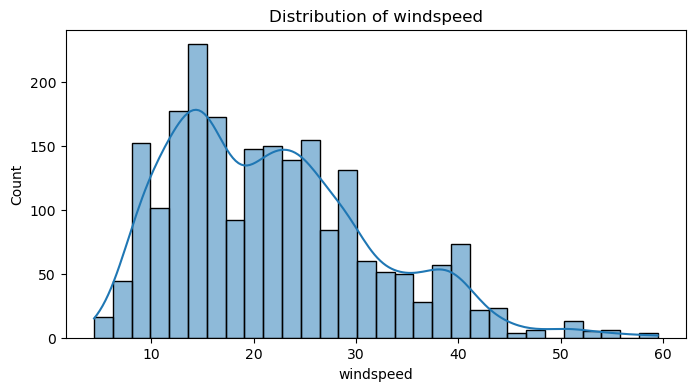

In [3]:
numerical_cols = ['pressure', 'maxtemp', 'temparature', 'mintemp',
                  'dewpoint', 'humidity', 'cloud', 'sunshine',
                  'winddirection', 'windspeed']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

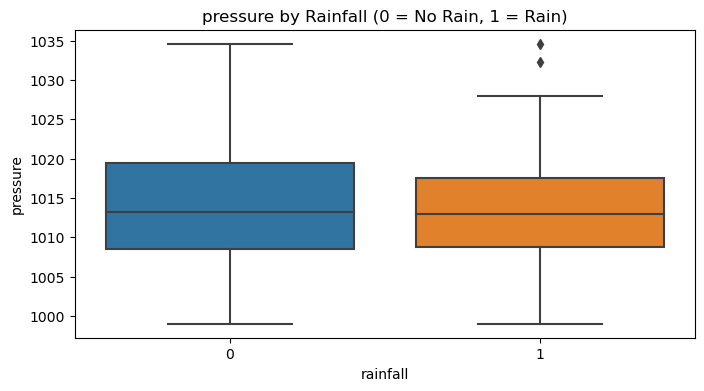

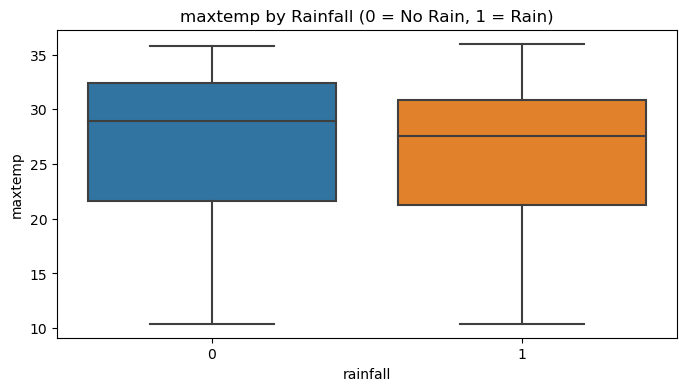

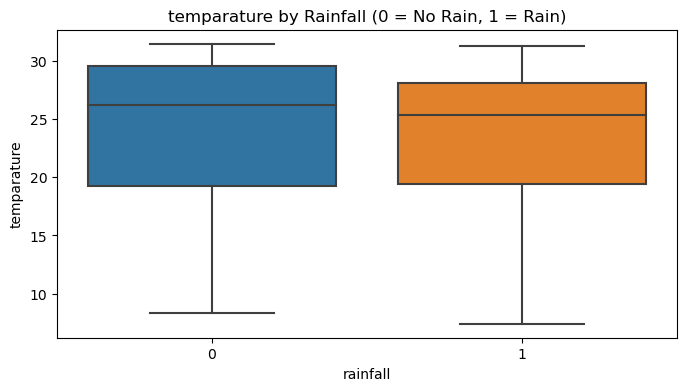

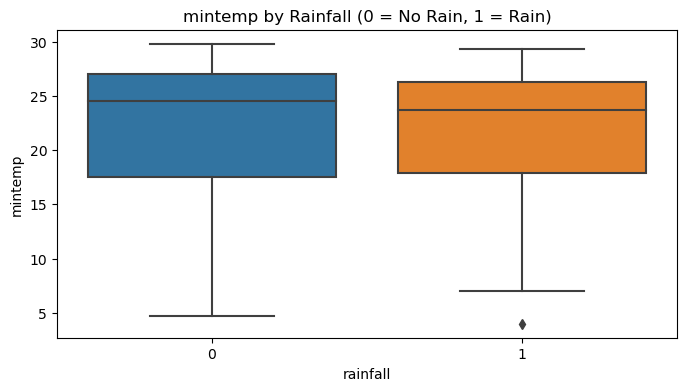

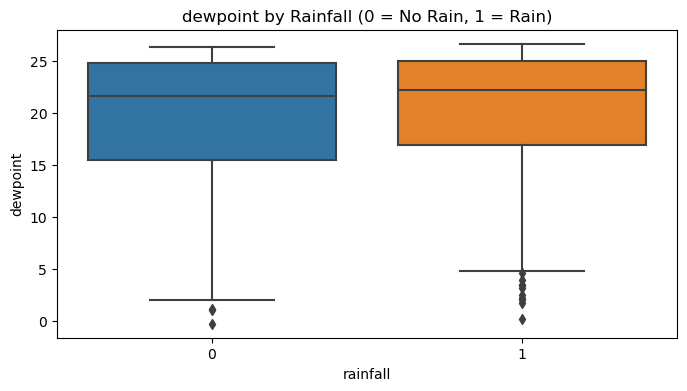

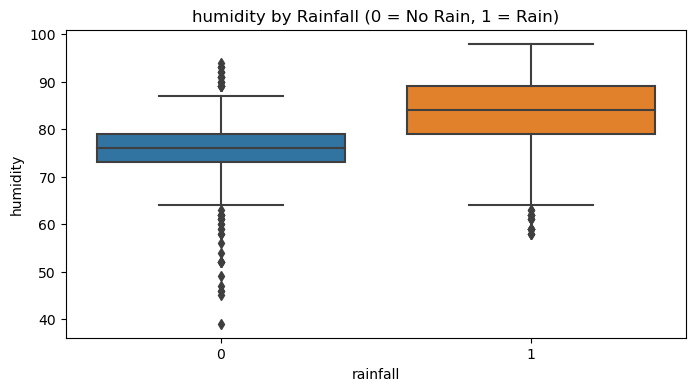

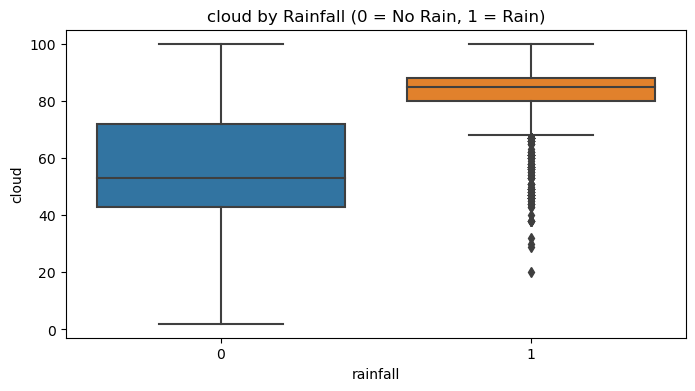

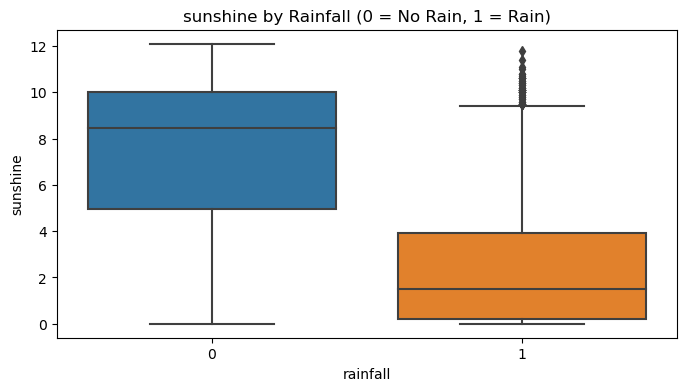

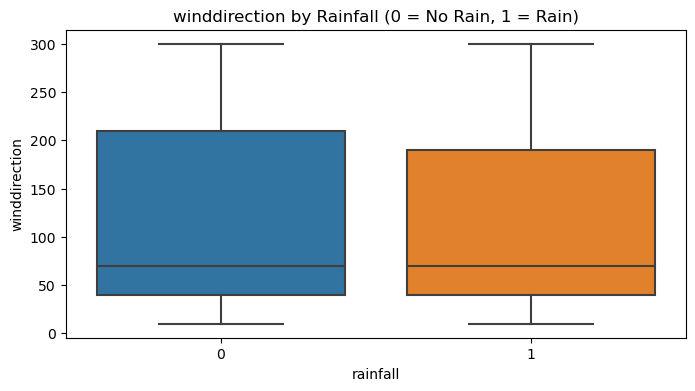

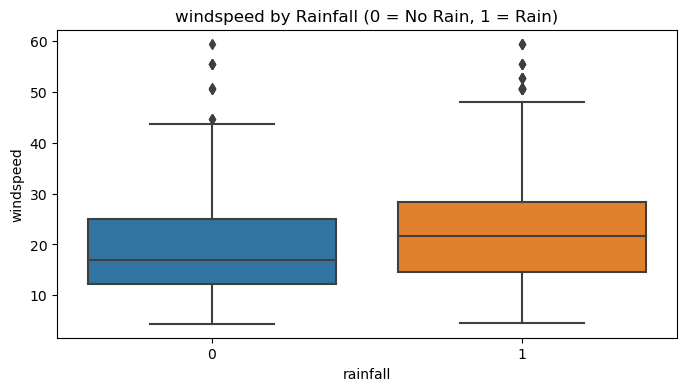

In [4]:
# Rain vs no rain features

numerical_cols = ['pressure', 'maxtemp', 'temparature', 'mintemp',
                  'dewpoint', 'humidity', 'cloud', 'sunshine',
                  'winddirection', 'windspeed']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='rainfall', y=col)
    plt.title(f"{col} by Rainfall (0 = No Rain, 1 = Rain)")
    plt.show()

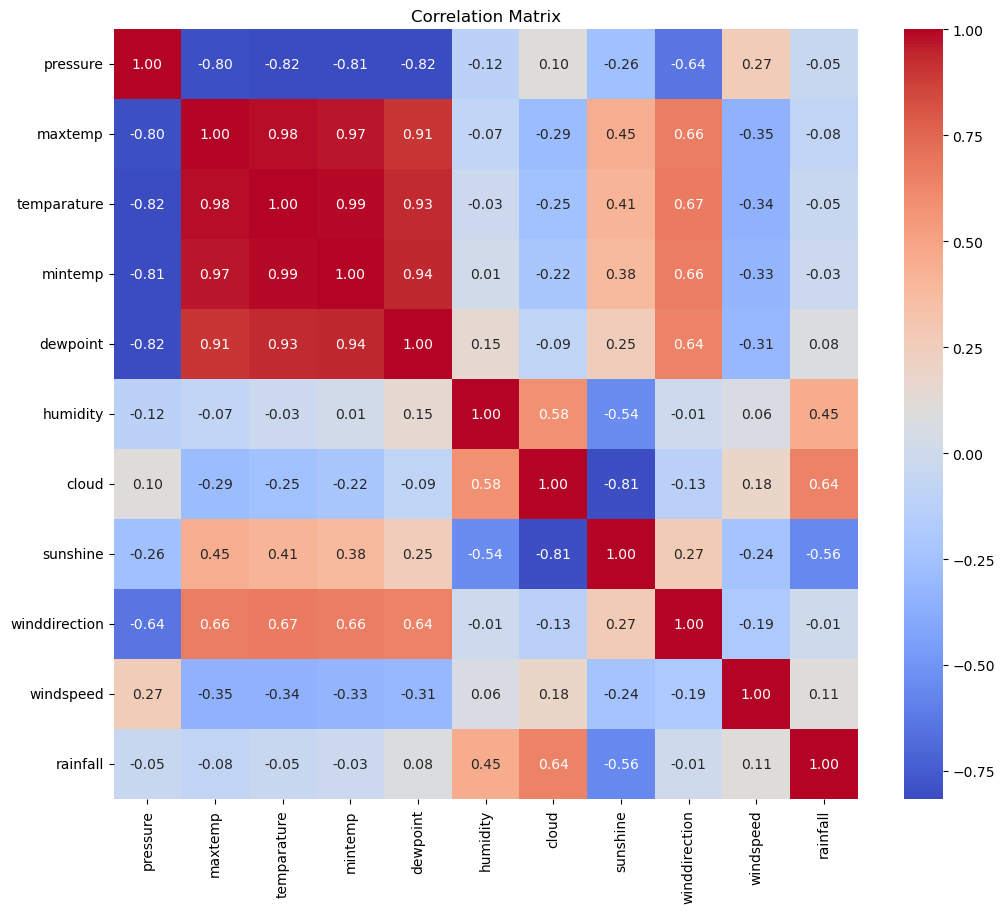

In [5]:
# correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols + ['rainfall']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

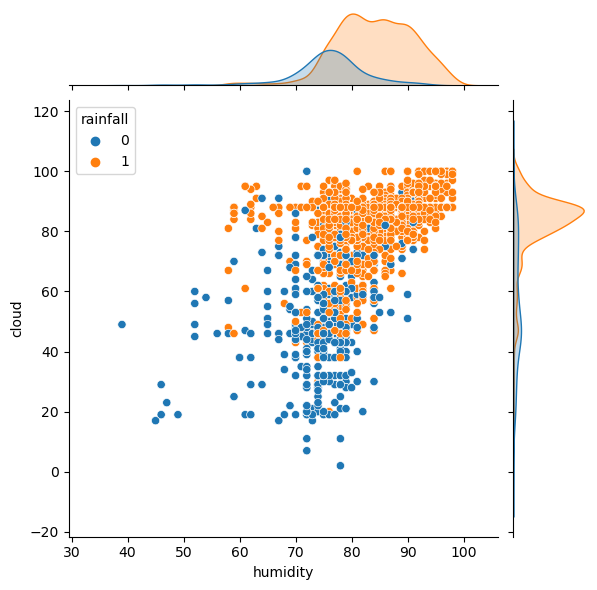

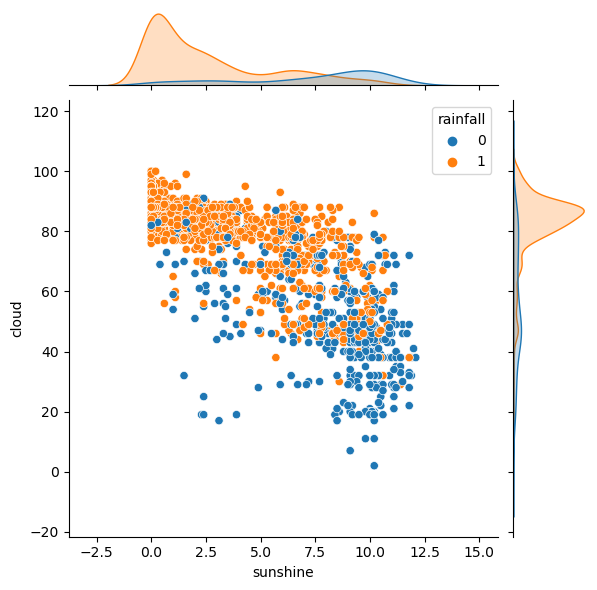

In [6]:
# key relationships
sns.jointplot(data=df, x='humidity', y='cloud', hue='rainfall', kind='scatter')
sns.jointplot(data=df, x='sunshine', y='cloud', hue='rainfall', kind='scatter')

In [7]:
# To capture the directional nature of "winddirection", we create a polar graph.

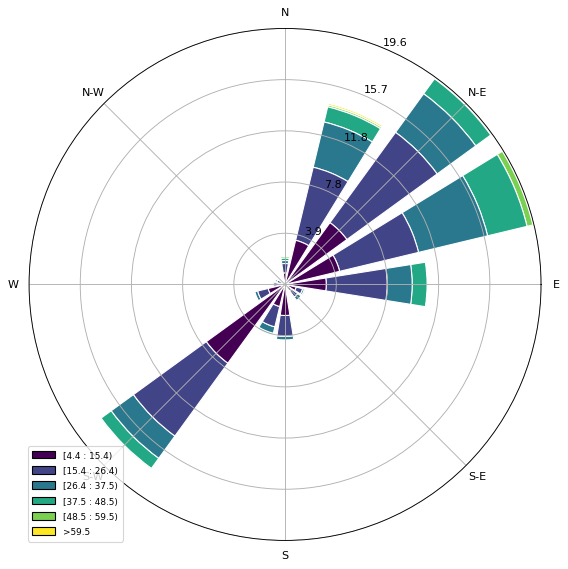

In [8]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['winddirection'], df['windspeed'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

## FEATURE ENGINEERING

Did some research into what weather conditions are most predictive of weather

High afternoon humidity the day before is an influential predictor. The intuition is straightforward: a high afternoon humidity often indicates a moist atmosphere that is prone to producing rain by the next day (especially if overnight cooling leads to saturation or if a weather system is present).

Indicates moisture availability in the air; high relative humidity or dew point means air is near saturation, a prerequisite for cloud and rain formation. Physically, abundant low-level moisture increases precipitation efficiency and likelihood.	Almost universally a top feature in ML models. For example, relative humidity was the top predictor in a Random Forest for Australian rain.

“RainToday”, a binary feature indicating if it rained in the current day, is essentially a persistence indicator; when included, it can be a very strong predictor for rain tomorrow.

Similarly, atmospheric pressure features in that dataset (pressure at 9am/3pm) carry importance – lower pressure tends to correlate with rainy weather, so models learn from that.

ften included in historical weather datasets and can be a strong proxy for rain. ML models learn that “cloudy now means likely rain soon.” For example, daily sunshine hours had a notable negative correlation with rainfall (r ≈ –0.35) in one study RESEARCHSQUARE.COM ,and including it improved prediction. Cloud cover features can rank high especially for immediate (next-hour/next-day) rain nowcasting. However, in models focusing purely on prediction from antecedent conditions, cloud cover might be excluded to avoid using an effect of rain to predict rain.

Commonly included in datasets and moderately important. ML models often find surface temperature predictive in combination with humidity (e.g. temperature can modulate the probability of rain given a humidity level). In some climates, temperature is a strong indicator (e.g. high temp + high humidity signals convective storm potential MDPI.COM. Generally, ML ranks temp below direct moisture measures, but it still appears among top features especially where it delineates rainy vs dry seasons.

Convective Available Potential Energy (CAPE) and related indices measure the buoyancy of air – higher values mean the atmosphere can support stronger updrafts and convective rain. Physically, instability is required for thunderstorms and intense showers. So, have a feature that captures instability.

In [9]:
# # humidity features

# df['humidity_lag_1'] = df['humidity'].shift(1)
# # df['humidity_lag_2'] = df['humidity'].shift(2)
# # df['humidity_lag_3'] = df['humidity'].shift(3)
# df['humidity_diff_1'] = df['humidity'] - df['humidity_lag_1']
# # df['humidity_diff_2'] = df['humidity'] - df['humidity_lag_2']
# df['high_humidity_flag'] = (df['humidity'] > 80).astype(int)
# # df['rising_humidity_flag'] = (df['humidity_diff_1'] > 5).astype(int)

In [10]:
# pressure features

# df['pressure_lag_1'] = df['pressure'].shift(1)
# df['pressure_diff_1'] = df['pressure'] - df['pressure_lag_1']
# df['pressure_diff_3'] = df['pressure'] - df['pressure'].shift(3)
# df['pressure_std_3'] = df['pressure'].rolling(window=3).std()

In [11]:
#cloud & sunshine features
df['cloud_lag_1'] = df['cloud'].shift(1)
# df['cloud_lag_2'] = df['cloud'].shift(2)

df['sunshine_lag_1'] = df['sunshine'].shift(1)
# df['sunshine_lag_2'] = df['sunshine'].shift(2)

df['cloud_sun_interaction'] = df['cloud'] * df['sunshine']
df['cloud_lag_1_sun_today'] = df['cloud_lag_1'] * df['sunshine']
df['cloudy_no_sun_flag'] = ((df['cloud'] > 6) & (df['sunshine'] < 1)).astype(int)
df['darkness'] = df['cloud'] * (1 - df['sunshine'] / df['sunshine'].max())
df['humid_cloud'] = df['humidity'] * df['cloud']
df['cloud_sunshine_ratio'] = df['cloud'] / (df['sunshine'] + 1e-3)  # epsilon to avoid division by zero

In [12]:
# # dewpoint features
# df['hot_dewpoint_flag'] = ((df['temparature'] > 28) & (df['dewpoint'] > 21)).astype(int)
# df['dewpoint_depression'] = df['temparature'] - df['dewpoint']
# df['dewpoint_humidity_interaction'] = df['dewpoint'] * df['humidity']
# df['dewpoint_cloud'] = df['dewpoint'] * df['cloud']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [10]:
def engineer_features(df):
    df['humidity_lag_1'] = df['humidity'].shift(1)
    df['humidity_diff_1'] = df['humidity'] - df['humidity_lag_1']
    df['high_humidity_flag'] = (df['humidity'] > 80).astype(int)
    df['cloud_lag_1'] = df['cloud'].shift(1)
    df['sunshine_lag_1'] = df['sunshine'].shift(1)
    df['cloud_sun_interaction'] = df['cloud'] * df['sunshine']
    df['cloud_lag_1_sun_today'] = df['cloud_lag_1'] * df['sunshine']
    df['cloudy_no_sun_flag'] = ((df['cloud'] > 6) & (df['sunshine'] < 1)).astype(int)
    df['darkness'] = df['cloud'] * (1 - df['sunshine'] / df['sunshine'].max())
    df['humid_cloud'] = df['humidity'] * df['cloud']
    df['cloud_sunshine_ratio'] = df['cloud'] / (df['sunshine'] + 1e-3)
    df['hot_dewpoint_flag'] = ((df['temparature'] > 28) & (df['dewpoint'] > 21)).astype(int)
    df['dewpoint_depression'] = df['temparature'] - df['dewpoint']
    df['dewpoint_humidity_interaction'] = df['dewpoint'] * df['humidity']
    df['dewpoint_cloud'] = df['dewpoint'] * df['cloud']
    return df

df = engineer_features(df)

In [11]:
pd.set_option('display.max_columns', None)  # Show all columns
print(df.loc[42])

id                                  42.0
day                                 43.0
pressure                          1013.1
maxtemp                             21.4
temparature                         20.9
mintemp                             19.4
dewpoint                            17.8
humidity                            83.0
cloud                               88.0
sunshine                             0.0
winddirection                       30.0
windspeed                           20.8
rainfall                             1.0
humidity_lag_1                      75.0
humidity_diff_1                      8.0
high_humidity_flag                   1.0
cloud_lag_1                         46.0
sunshine_lag_1                       4.1
cloud_sun_interaction                0.0
cloud_lag_1_sun_today                0.0
cloudy_no_sun_flag                   1.0
darkness                            88.0
humid_cloud                       7304.0
cloud_sunshine_ratio             88000.0
hot_dewpoint_fla

## MODEL TRAINING

In [12]:
from sklearn.model_selection import train_test_split

df = df.dropna()
X = df.drop(columns=["rainfall", "id", "day", "winddirection", "windspeed", "pressure"])
y = df["rainfall"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

feature_names = X_train.columns

### Data Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Baseline!

In [28]:
from sklearn.linear_model import LogisticRegression
rf_model = LogisticRegression(max_iter=1000, random_state=2183)

rf_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2183)

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

preds = rf_model.predict_proba(X_test)[:,1]

train_auc = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, preds) 

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Train AUC: 0.8982
Test AUC: 0.8886


In [30]:
import numpy as np

coefficients = rf_model.coef_[0]

importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_importance': np.abs(coefficients)
})

importance_df = importance_df.sort_values(by='abs_importance', ascending=False)

display(importance_df)

,feature,coefficient,abs_importance
5,cloud,0.457362,0.457362
16,humid_cloud,0.411453,0.411453
21,dewpoint_cloud,0.315906,0.315906
15,darkness,0.309891,0.309891
2,mintemp,-0.279135,0.279135
3,dewpoint,0.230859,0.230859
0,maxtemp,0.226084,0.226084
14,cloudy_no_sun_flag,0.219533,0.219533
1,temparature,0.172433,0.172433
13,cloud_lag_1_sun_today,-0.171107,0.171107


### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=41)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=41)

In [47]:
preds = rf_model.predict_proba(X_test)[:,1]

train_auc = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, preds) 

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Train AUC: 0.9372
Test AUC: 0.8854


In [48]:
importances = rf_model.feature_importances_

rf_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

display(rf_importance_df)

,feature,importance
16,humid_cloud,0.197831
5,cloud,0.165245
17,cloud_sunshine_ratio,0.135310
15,darkness,0.120705
6,sunshine,0.066518
21,dewpoint_cloud,0.063201
4,humidity,0.045223
13,cloud_lag_1_sun_today,0.030524
12,cloud_sun_interaction,0.026988
20,dewpoint_humidity_interaction,0.022413


### XGBOOOOOOOOOST

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
rf_model = XGBClassifier(n_estimators=100, reg_lambda=100, learning_rate=0.1, colsample_bytree=0.8, random_state=14)

rf_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

preds = rf_model.predict_proba(X_test)[:,1]

train_auc = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, preds) 

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Train AUC: 0.9346
Test AUC: 0.8892


,feature,importance
5,cloud,0.413829
16,humid_cloud,0.245690
15,darkness,0.048702
21,dewpoint_cloud,0.038737
14,cloudy_no_sun_flag,0.034496
17,cloud_sunshine_ratio,0.028242
6,sunshine,0.023884
12,cloud_sun_interaction,0.019703
20,dewpoint_humidity_interaction,0.018895
13,cloud_lag_1_sun_today,0.015923


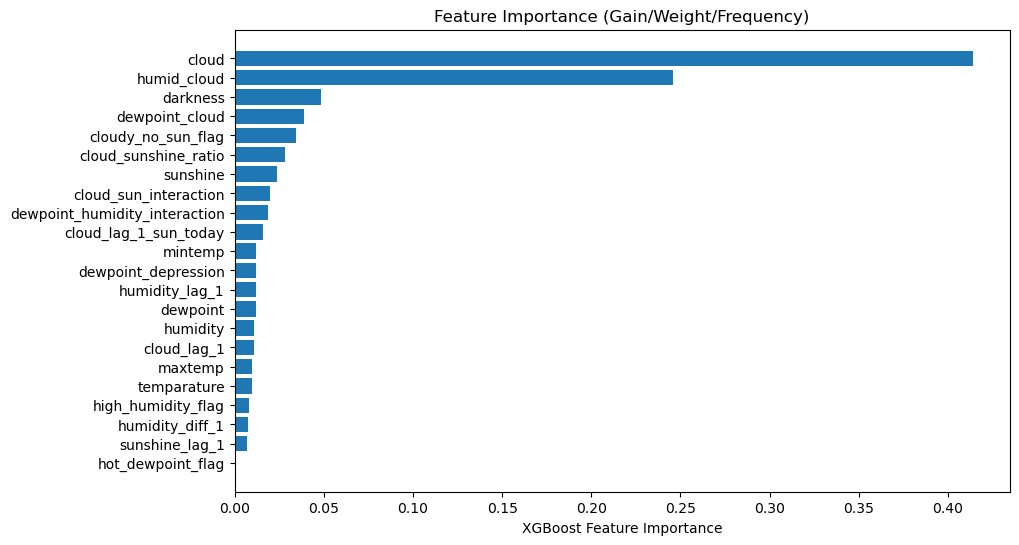

In [17]:
importances = rf_model.feature_importances_

xgb_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

display(xgb_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['feature'], xgb_importance_df['importance'])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance (Gain/Weight/Frequency)")
plt.gca().invert_yaxis()
plt.show()

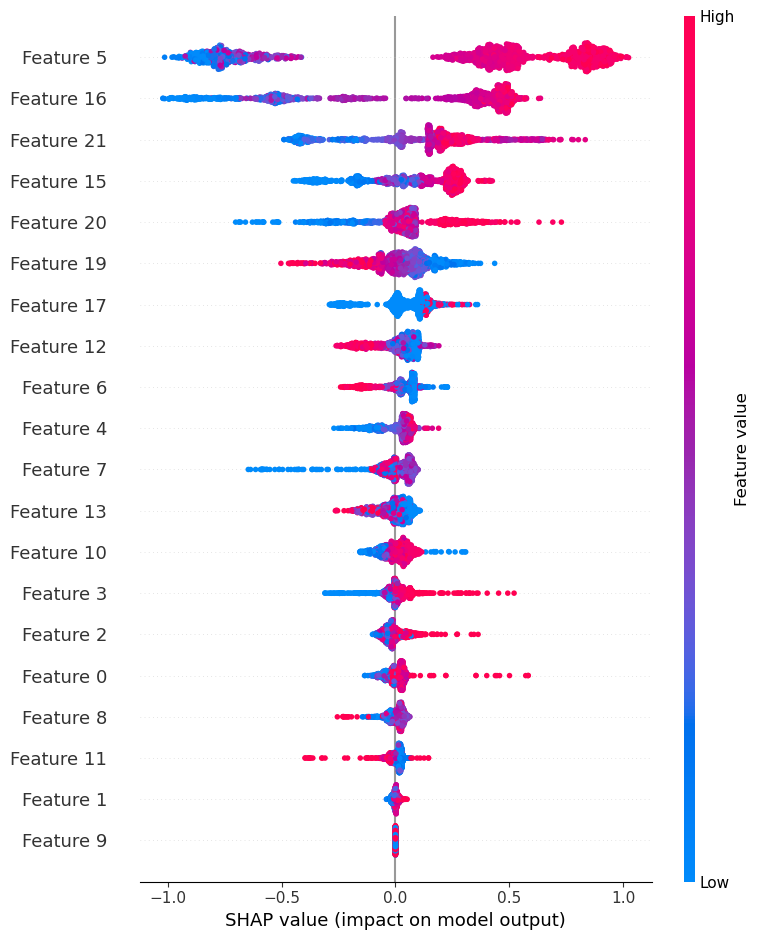

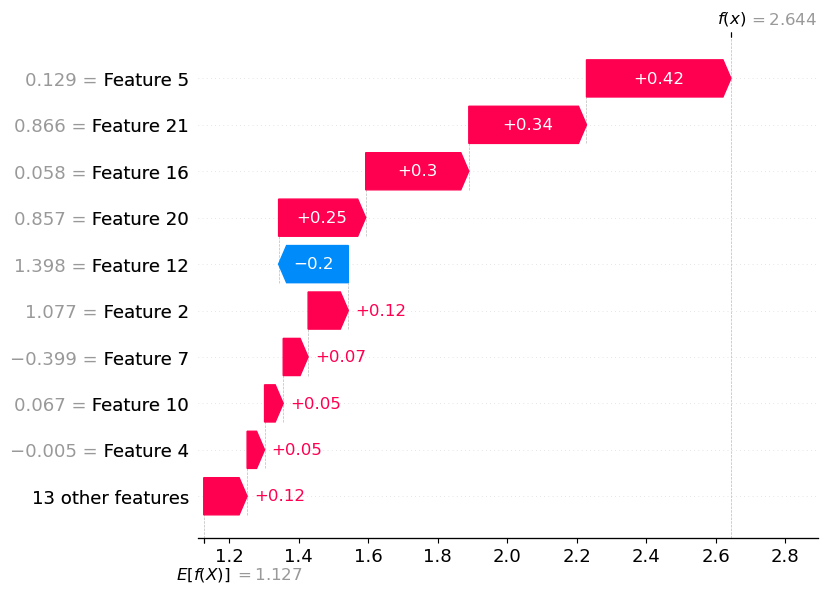

In [18]:
import shap

explainer = shap.Explainer(rf_model)
shap_values = explainer(X_train)

# Global summary plot
shap.summary_plot(shap_values, X_train)

# Detailed view for a single row
shap.plots.waterfall(shap_values[0])

## ROC CURVE

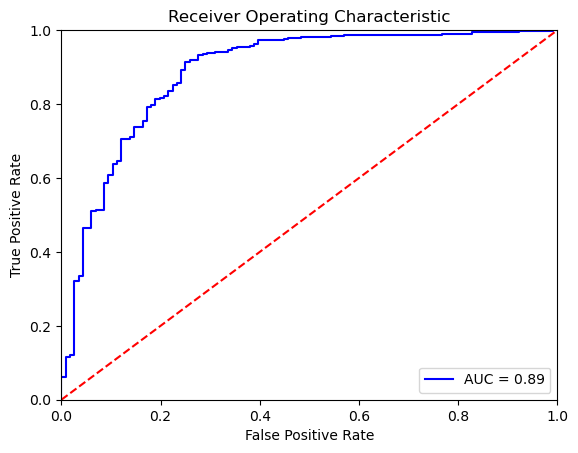

In [19]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## PREPPING FOR SUBMISSION

In [49]:
test_df = pd.read_csv('test.csv')
X = test_df
X_df = pd.DataFrame(X)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 1 to 2189
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2189 non-null   int64  
 1   day                            2189 non-null   int64  
 2   pressure                       2189 non-null   float64
 3   maxtemp                        2189 non-null   float64
 4   temparature                    2189 non-null   float64
 5   mintemp                        2189 non-null   float64
 6   dewpoint                       2189 non-null   float64
 7   humidity                       2189 non-null   float64
 8   cloud                          2189 non-null   float64
 9   sunshine                       2189 non-null   float64
 10  winddirection                  2189 non-null   float64
 11  windspeed                      2189 non-null   float64
 12  rainfall                       2189 non-null   i

In [51]:
X_df = engineer_features(X_df)
X_df['humidity_lag_1'].fillna(test_df['humidity'].mean(), inplace=True)
X_df['humidity_diff_1'].fillna(0, inplace=True)
X_df['cloud_lag_1'].fillna(test_df['cloud'].mean(), inplace=True)
X_df['sunshine_lag_1'].fillna(test_df['sunshine'].mean(), inplace=True)
X_df['cloud_lag_1_sun_today'].fillna(test_df['cloud_lag_1'].mean() * test_df['sunshine'].mean(), inplace=True)


id_df = X_df.pop('id')
X_df = X_df.drop(columns=["day", "winddirection", "windspeed", "pressure"])
X_df = scaler.transform(X_df)

In [52]:
y = rf_model.predict_proba(X_df)[:, 1]

submission = pd.DataFrame({
    'id': id_df,
    'rainfall': y.flatten()
})

In [53]:
num_rows = submission.shape[0]
print(num_rows)

#save
submission.to_csv('submission.csv', index=False)

730


In [54]:
submission

,id,rainfall
0,2190,0.945995
1,2191,0.974538
2,2192,0.846142
3,2193,0.162418
4,2194,0.152465
...,...,...
725,2915,0.964605
726,2916,0.886448
727,2917,0.970352
728,2918,0.976036
